# **Data Science  Project** 

## **GROUP - 9**  

--Yash Mehta - 19070123137	

--Kankshita K - 19070123051	

--Anisha Milred - 19070123008 

--Sharmishtha Tongia - 19070123125 

--Shivashankarar Murugan - 19070123106	

### **Title** : "PREDICTION OF POTENTIALLY HAZARDOUS NEAREST EARTH OBJECTS (NEOs) USING MACHINE LEARNING" 

### The attributes of NASA NEO dataset are:

-> id : identifier (the same object can have several rows in the dataset, as it has been observed multiple times)

-> name : name given by NASA (including the year the asteroid was discovered)

-> est_diameter_min : minimum estimated diameter in kilometers

-> est_diameter_max : maximum estimated diameter in kilometers

-> relative_velocity : velocity relative to earth

-> miss_distance : distance in kilometers it misses Earth

-> orbiting_body : planet that the asteroid orbits

-> sentry_object : whether it is included in sentry - an automated collision monitoring system

-> absolute_magnitude : intrinsic luminosity

-> hazardous : whether the asteriod is potentially harmful or not

### Importing Required Libraries

In [ ]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import plotly.express as px
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive')

Mounted at /content/drive


### Importing Dataset

In [ ]:
df = pd.read_csv("neo.csv")
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
# Finding Unqiue Values in Each columns
df.nunique()

In [ ]:
# Finding Correlation between Features in Dataset
df.corr()

In [ ]:
# Dropping insignificant Features
df = df.drop(columns = ["id","sentry_object","orbiting_body"])
df.head()

,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


In [ ]:
#df["orbiting_body"].value_counts().unique()

In [ ]:
#df["sentry_object"].value_counts()

In [ ]:
# Counting The Number of Hazardous and Non Hazardous Asteriods Count
df["hazardous"].value_counts()  

False    81996
True      8840
Name: hazardous, dtype: int64

In [ ]:
## Finding Null/ NA values in dataset 
df.isnull().sum() 

name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

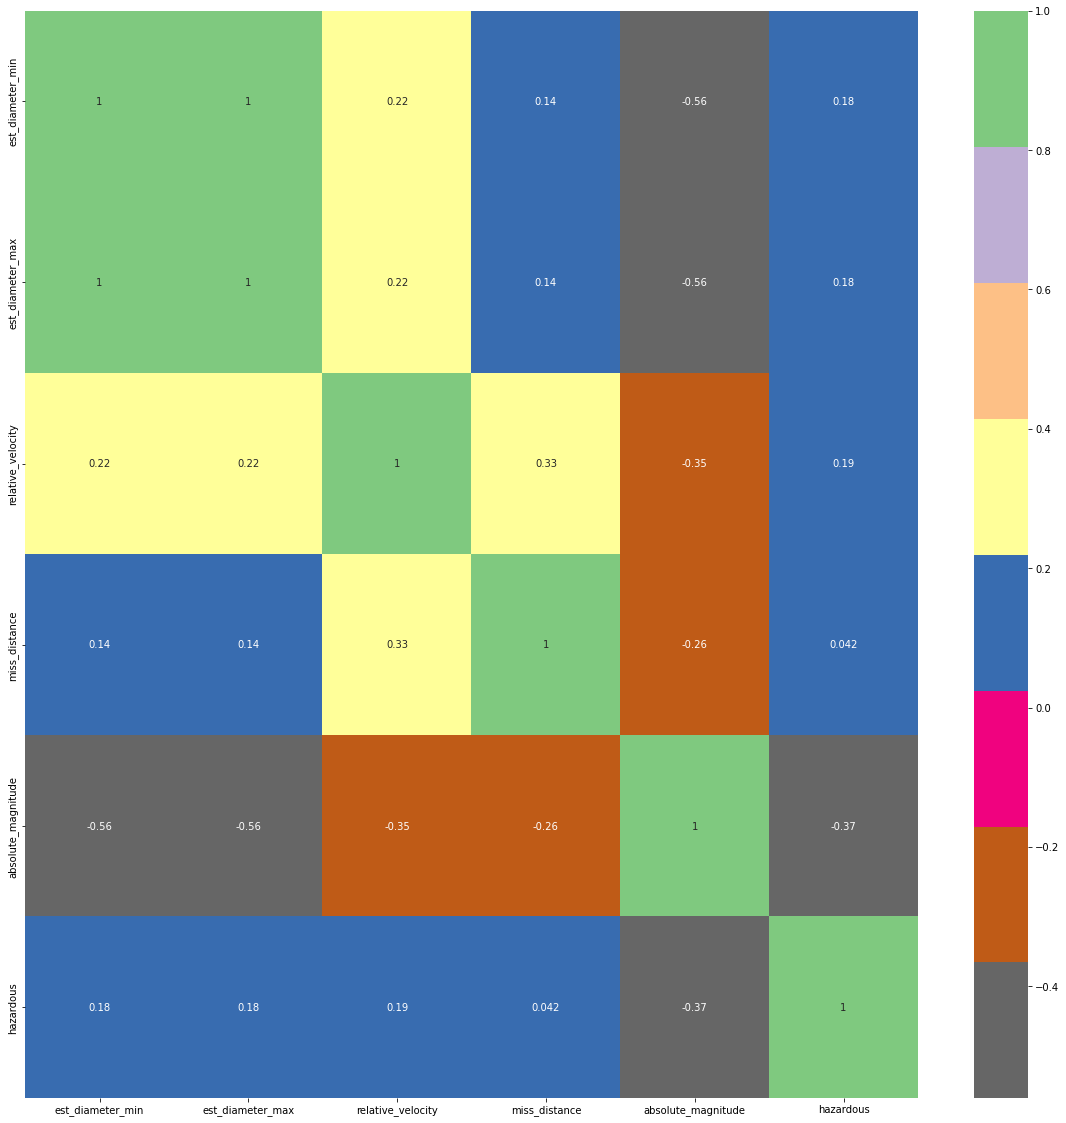

In [ ]:
# Heatmap for NEO Dataset
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Accent_r)
plt.show()

## Data Visualization 

In [ ]:
# Plot the number of True (1) and False (0) in hazardous feature  
plt.figure(figsize=(8,8))
sns.countplot(x = 'hazardous', data = df )

In [ ]:
# Box Plot 
plt.figure(figsize=(15,15))
plot=['est_diameter_min', 'est_diameter_max','relative_velocity', 'miss_distance','absolute_magnitude', 'hazardous']
df.boxplot(plot)

In [ ]:
# Plotting Histogram for Velocity and Miss Distance of Hazardous Objects 
PLot1 = px.histogram(df, y = "relative_velocity", x = "miss_distance", 
                    color = "hazardous", hover_data = df.columns, 
                    title = 'Plotting Velocity and Miss Distance of Hazardous Objects')
PLot1.show()

In [ ]:
Plot2 = px.scatter(df, y="relative_velocity", x="miss_distance", color="hazardous", size = 'est_diameter_min',
                   hover_data=df.columns, template = 'plotly_dark',
                  title = 'Velocity and Miss Distance of Hazardous Objects with Minimum Diameter of object')
Plot2.show()

In [ ]:
# Plotting Magnitude with respect to Estimated Diameter of the asteriod which are hazardous and Non-Hazardous
plot3 = px.scatter(df ,  x = 'absolute_magnitude', y= 'est_diameter_min', color="hazardous", template = 'ggplot2', 
                  title = 'Plotting of Magnitude with respect to Estimated Diameter of the Asteriod (Hazardous) ' )
plot3.show()

In [ ]:
# Plotting Scatter Plot for Estimated Maximum Diameter and Velocity of the Asteriod
plot4 = px.scatter(df,y= 'est_diameter_max' ,x = 'relative_velocity',  template = 'plotly_dark', title= "Scatter Plot for Estimated Maximum Diameter and Velocity of the Asteriod")
plot4.show()

In [ ]:
# plt5= sns.pairplot(df,hue = 'hazardous')
# plt5.fig.suptitle("Your Title", y=1.08)

In [ ]:
# let's start grouping everything by hazardous

nHz = df[(df["hazardous"] == False)]
hz = df[(df["hazardous"] == True)]

# function to show the hazardous and non-hazardous distributions of a variable
def compare_dist_hazard(columnName):
    
    f, ax = plt.subplots(figsize=(6, 5))

    ax = sns.kdeplot(nHz[columnName], ax=ax, color="tab:green", label="Not Hazardous")
    ax = sns.kdeplot(hz[columnName], ax=ax, color="tab:red", label="Hazardous")
    
    ax.set_xlabel("")
    ax.set_yticklabels([])
    ax.set_title(columnName + " grouped by hazardous")
    ax.legend()
    plt.show()

In [ ]:
compare_dist_hazard("absolute_magnitude")

In [ ]:
compare_dist_hazard("miss_distance")

## Data Modelling 

In [ ]:
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,RandomizedSearchCV
x = df.drop(["hazardous","name"], axis=1)
y = df.hazardous.astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((63585, 5), (27251, 5), (63585,), (27251,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(x_train,y_train)

In [ ]:
# Test Dataset
pred1 = lr.predict(x_test)
pred1
from sklearn.metrics import classification_report, accuracy_score
lr_acc = accuracy_score(pred1,y_test)
print(f"Test Dataset Accuracy score : {lr_acc}\n")
# train dataset
predtest= lr.predict(x_train)

lr_acc1  = accuracy_score(predtest,y_train)
print(f"Train Dataset Accuracy score : {lr_acc1}\n")

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
lr_acc = accuracy_score(pred1,y_test)
print(f'The Accuracy of Logistic Regression is : {lr_acc}\n')
print("Confusion Matrix =  \n",confusion_matrix(pred1,y_test))

In [ ]:
# Test Dataset Confusion Matrix 
cm = confusion_matrix(pred1,y_test)
sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('lr Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,pred1))

In [ ]:
# Train Dataset Confusion Matrix 
cm = confusion_matrix(predtest,y_train)
sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('lr Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_train,predtest))

## Support Vector Machine 

In [ ]:
from sklearn.svm import SVC
knn = SVC()
knn.fit(x_train,y_train)

In [ ]:
# Test Dataset 
pred2 = knn.predict(x_test)
pred2
svc_acc = accuracy_score(pred2,y_test)
print(f"Test Dataset Accuracy score : {svc_acc}\n")
# Train Dataset
pred_train = knn.predict(x_train)
pred_train
svc_acc1  = accuracy_score(pred_train,y_train)
print(f"Train Dataset Accuracy score : {svc_acc1}\n")

In [ ]:
# Test Dataset 
svc_acc = accuracy_score(pred2,y_test)
print(f'The Accuracy of SVM Classifier Model is : {svc_acc} \n')
print("Confusion Matrix = \n",confusion_matrix(pred2,y_test))
print()
# Train Dataset 
svc_acc = accuracy_score(pred2,y_test)
print(f'The Accuracy of SVM Classifier Model is : {svc_acc1} \n')
print("Confusion Matrix =\n",confusion_matrix(pred_train,y_train))

In [ ]:
# Test Dataset Confusion Matrix
cm = confusion_matrix(pred2,y_test)
sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('SVC Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,pred2))

In [ ]:
# Train Dataset Confusion Matrix 
cm = confusion_matrix(pred_train,y_train)
sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('SVC Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_train,pred_train))

## Random Forest Classifier 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
# Test Dataset Prediiction 
pred3 = RF.predict(x_test)
pred3
# Train Dataset Prediction 
pred_train = RF.predict(x_train)
pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
rf_acc = accuracy_score(pred3,y_test)
# rf_acc = accuracy_score(pred_train,y_train) # Overfitting 
print(f'The Accuracy of Random Forest Classifier Model is : {rf_acc} \n')
print("Confusion Matrix = \n",confusion_matrix(pred3,y_test))

NameError: ignored

In [ ]:
cm = confusion_matrix(pred3,y_test)
sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('RF Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,pred3))

In [ ]:
clf = RandomForestClassifier(random_state=18)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
# number of features in consideration at every split 
max_features = ['auto', 'sqrt'] 
# maximum number of levels allowed in each decision tree
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
# minimum sample number to split a node 
min_samples_split = [2, 6, 10]
# minimum sample number that can be stored in a leaf node 
min_samples_leaf = [1, 3, 4]
#  Method of selecting samples for training each tree
bootstrap = [True, False] 

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

grid_clf = RandomizedSearchCV(clf,random_grid, cv=cv)
grid_clf.fit(x_train, y_train)
pred_train = grid_clf.predict(x_train)
print(classification_report(y_train,pred_train))

# pred_train = rf.fit(x_train,y_train).predict(x_train)
# evaluation(y_train,pred_train)


NameError: ignored

## Comparsion of Machine Learning Model Implemented

In [ ]:
lr_acc = 90.20
rf_acc = 91.68
svc_acc= 91.15
x = ['lr','SVC','RF']
y =[lr_acc,svc_acc,rf_acc]
fig, ax = plt.subplots()
width = 0.50
pps = ax.bar(x, y, width, align='center',color = ['blue', 'orange', 'red'])

for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,s="{}%".format(height),ha='center')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()

In [ ]:
print(f"The Random Forest Classifier Model has the highest accuracy score : {rf_acc}")

In [ ]:
# plot = df.plot.pie(y='hazardous', figsize=(5, 5))

In [ ]:
df1 = df[df.hazardous].copy(deep=True)
df_final1 = df1.sort_values("miss_distance", axis=0, ascending=False).head(10)
df_final1

In [ ]:
df1 = df[~df.hazardous].copy(deep=True)
df_final2 = df1.sort_values("miss_distance", axis=0, ascending=True).head(10)
df_final2


In [ ]:
df = pd.read_csv("neo.csv")
df.head()
df['hazardous'] = (df["hazardous"] == True).astype(int)
count = (df['hazardous'] == 1).sum()
count1 =(df['hazardous'] == 0).sum()

# df.groupby(['hazardous']).plot(kind='pie', y='hazardous', autopct='%1.0f%%')
plt.pie([count,count1], labels = ["Hazardous","Non-Hazardous"],autopct='%1.0f%%'  )
plt.title("Distribution of Hazardous and Non- Hazardous Asteriods")
plt.show()

In [ ]:
def Input(est_diameter_min, est_diameter_max, relative_velocity,miss_d,magnitude):
  x = np.asarray(x)
  y = np.asarray(y)
  z = np.asarray(z)
  zz = np.asarray(zz)
  zzz = np.asarray(zzz)
  input_data = [[x,y,z,zz,zzz]]
  input = input_data
  prediction = RF.predict(input)
  if prediction == 0 : 
    print("Asteriod is not hazardous") 
  elif(prediction == 1) : 
    print("Asteriod is Hazardous")

In [ ]:
import pickle 
filename = 'train_model.sav'
pickle.dump(grid_clf,open(filename,"wb"))

In [ ]:
loaded_model = pickle.load(open('train_model.sav','rb'))